In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import scipy as sp

# EPL 17/18 Season

In [649]:
# stats_def = pd.read_csv("csv_files/tot_1718_def.csv")
# stats_fw = pd.read_csv("csv_files/tot_1718_fw.csv")
# stats_kp = pd.read_csv("csv_files/tot_1718_keeper.csv")
# stats_mid = pd.read_csv("csv_files/tot_1718_mid.csv")
# stats_fw.head(1) # 1번 row Son-Heung-Min

# # 2017/18 value 저장

# corr_fw_95_1718 = corr_fw_95
# corr_def_85_1718 = corr_def_85
# corr_kp_95_1718 = corr_kp_95
# corr_mid_95_1718 = corr_mid_95

# stats_fw_1718 = est_fw
# stats_def_1718 = est_def
# stats_kp_1718 = est_kp
# stats_mid_1718 = est_mid

corr_fw_95_1718
corr_def_85_1718
corr_kp_95_1718
corr_mid_95_1718

stats_fw_1718
stats_def_1718
stats_kp_1718
stats_mid_1718

[1.3598, 1.1712, 1.1764, 1.2596, 1.2233, 1.3388, 1.3719, 1.2071]

# EPL 16/17 Season

In [ ]:
# stats_def = pd.read_csv("csv_files/tot_1617_def.csv")
# stats_fw = pd.read_csv("csv_files/tot_1617_fw.csv")
# stats_kp = pd.read_csv("csv_files/tot_1617_keeper.csv")
# stats_mid = pd.read_csv("csv_files/tot_1617_mid.csv")
# stats_fw.head(2) # 0번 row Son-Heung-Min

# EPL 15/16 Season

# EPL 18/19 Season

# Calculate Sesonal Condition

In [650]:
stats_def = pd.read_csv("csv_files/tot_1617_def.csv")
stats_fw = pd.read_csv("csv_files/tot_1617_fw.csv")
stats_kp = pd.read_csv("csv_files/tot_1617_keeper.csv")
stats_mid = pd.read_csv("csv_files/tot_1617_mid.csv")
stats_fw.head(2) # 0번 row Son-Heung-Min

,Name,Position,id,link,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,...,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance
0,Son-Heung-Min,Forward,4999,https://www.premierleague.com/players/4999/Son...,14,0.41,0,9,5,0,...,62,2,0,9,22,19,21,7,6,3
1,Harry-Kane,Forward,3960,https://www.premierleague.com/players/3960/Har...,29,0.97,2,20,7,5,...,29,3,0,23,17,22,21,4,21,15


In [651]:
stats_shm = stats_fw[stats_fw['Name']=='Son-Heung-Min']
# stats_shm.shape # (1,30)
stats_shm # 종속변수 : Goals per match

,Name,Position,id,link,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,...,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance
0,Son-Heung-Min,Forward,4999,https://www.premierleague.com/players/4999/Son...,14,0.41,0,9,5,0,...,62,2,0,9,22,19,21,7,6,3


### forward table preprocessing

In [652]:
stats_fw.columns
use_col_fw = ['Goals', 'Goals per match', 'Penalties scored', 'Freekicks scored', 
              'Shooting accuracy %', 'Hit woodwork', 'Big chances missed', 'Assists', 
              'Passes per match', 'Big chances created', 'Crosses', 
              'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Tackles', 
              'Blocked shots', 'Interceptions', 'Clearances', 'Headed Clearance']
stats_fw_pre = stats_fw[use_col_fw]
stats_fw_pre = stats_fw_pre.drop(1, axis=0).reset_index(drop=True) # 손흥민 행 드롭하기
stats_shm_pre = stats_shm[use_col_fw]
stats_fw_pre
# stats_fw_pre.shape # (7, 20)

,Goals,Goals per match,Penalties scored,Freekicks scored,Shooting accuracy %,Hit woodwork,Big chances missed,Assists,Passes per match,Big chances created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance
0,14,0.41,0,0,41,4,5,6,22.79,5,62,2,0,9,22,19,21,7,6,3
1,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0
2,2,0.07,1,0,47,1,5,2,8.33,2,10,0,0,31,8,15,5,2,2,2
3,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0
4,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0


#### Extracting Inner foward-stats relationship 

In [653]:
# 새로 영입된 선수 드롭시키기
stats_fw_part = stats_fw_pre # 복사시키기

for i in range(len(stats_fw_pre)):
    
    if (stats_fw_pre['Goals'][i]) == 0  :
        stats_fw_part = stats_fw_part.drop(i, axis=0)
        
stats_fw_part

,Goals,Goals per match,Penalties scored,Freekicks scored,Shooting accuracy %,Hit woodwork,Big chances missed,Assists,Passes per match,Big chances created,Crosses,Yellow cards,Red cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance
0,14,0.41,0,0,41,4,5,6,22.79,5,62,2,0,9,22,19,21,7,6,3
2,2,0.07,1,0,47,1,5,2,8.33,2,10,0,0,31,8,15,5,2,2,2


In [654]:
# 유의미한 종속변수 솎아내기

corr_fw = stats_fw_part.corr()

for i in use_col_fw:
    temp=0
    for j in corr_fw[i]:
        if j >= 0.95: # Goals
            temp += 1
    print(i, temp)

Goals 14
Goals per match 14
Penalties scored 3
Freekicks scored 0
Shooting accuracy % 3
Hit woodwork 14
Big chances missed 0
Assists 14
Passes per match 14
Big chances created 14
Crosses 14
Yellow cards 14
Red cards 0
Fouls 3
Offsides 14
Tackles 14
Blocked shots 14
Interceptions 14
Clearances 14
Headed Clearance 14


In [1]:
corr_fw

NameError: name 'corr_fw' is not defined

In [655]:
corr_fw = fw_part.corr()

# 관계없는 상관계수 행렬 드롭시키기 및 인덱스 반환하기
for i in use_col_fw:
    
    if str(corr_fw['Goals'][i]) == 'nan':
        corr_fw = corr_fw.drop(i, axis=0)
        corr_fw = corr_fw.drop(i, axis=1)
        
corr_fw_95 = corr_fw['Goals'][corr_fw['Goals']>=0.95].sort_values(ascending=False)[1:].to_frame()

col_fw_95 = list(corr_fw_95.index)

# dataframe으로 저장
corr_fw_95.to_csv("C:\\PythonProj\\csv_files\\corr_fw_95_df.csv", index=True)

corr_fw_95

,Goals
Blocked shots,0.999939
Fouls,0.999898
Goals per match,0.999324
Big chances missed,0.999318
Hit woodwork,0.998666
Clearances,0.986755
Offsides,0.974826


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


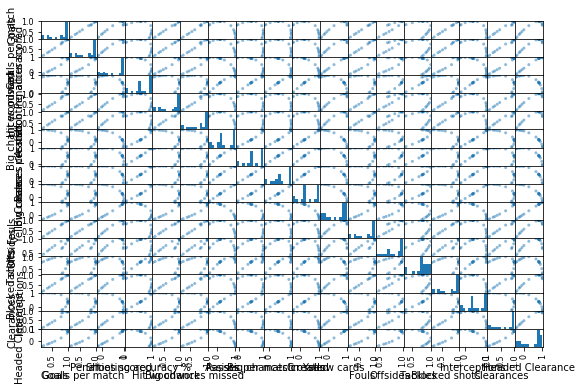

In [656]:
pd.scatter_matrix(corr_fw, figsize=(9, 6))
plt.show()

# 상관관계를 보기에는 표본집단이 너무 적음

In [657]:
from sklearn.preprocessing import normalize, scale

stats_fw_val = stats_fw_part[col_fw_95].values
stats_shm_val = stats_shm_pre[col_fw_95].values

x = np.vstack([stats_fw_val, stats_shm_val])
y1 = scale(x)
y2 = normalize(x)

print("original x:\n\n", x)
print("\nscale:\n\n", y1)
print("\nnorms (scale)\n\n", np.linalg.norm(y1, axis=1))
print("\nnormlize:\n\n", y2)
print("\nnorms (normalize)\n\n", np.linalg.norm(y2, axis=1))

original x:

 [[21.    9.    0.41  5.    4.    6.   22.  ]
 [ 5.   31.    0.07  5.    1.    2.    8.  ]
 [21.    9.    0.41  5.    4.    6.   22.  ]]

scale:

 [[ 0.70710678 -0.70710678  0.70710678  0.          0.70710678  0.70710678
   0.70710678]
 [-1.41421356  1.41421356 -1.41421356  0.         -1.41421356 -1.41421356
  -1.41421356]
 [ 0.70710678 -0.70710678  0.70710678  0.          0.70710678  0.70710678
   0.70710678]]

norms (scale)

 [1.73205081 3.46410162 1.73205081]

normlize:

 [[0.63807446 0.27346048 0.01245764 0.15192249 0.12153799 0.18230699
  0.66845896]
 [0.15214481 0.94329782 0.00213003 0.15214481 0.03042896 0.06085792
  0.2434317 ]
 [0.63807446 0.27346048 0.01245764 0.15192249 0.12153799 0.18230699
  0.66845896]]

norms (normalize)

 [1. 1. 1.]


In [658]:
est_fw = []

for i in range(len(y2)):
    est_fw.append(0)
    for j in range(len(y2[i])):
        
        est_fw[i] += y2[i][j]*corr_95.loc[col_95[j]]
    
    est_fw[i] = round(est_fw[i]['Goals'], 4)
    
est_fw # 각 선수별stat 점수화

[2.0286, 1.5773, 2.0286]

### defence table preprocessing

In [659]:
plus_col_def = ['Tackles', 'Tackle success %', 'Blocked shots', 
            'Interceptions','Recoveries','Assists','Passes per match',
            'Clearances', 'Headed Clearance', 'Clearances off line', 'Big chances created',
            'Clean sheets', 'Aerial battles won',
            'Duels won', 'Successful 50/50s']

minus_col_def = ['Goals conceded', 
             'Yellow cards', 'Red cards', 'Fouls', 'Offsides',
             'Duels lost', 'Aerial battles lost']

use_col_def = plus_col_def + minus_col_def

#### Extracting Inner foward-stats relationship

In [668]:
# 새로 영입된 선수 드롭시키기
stats_def_pre = stats_def[use_col_def]

stats_def_part = stats_def_pre # 복사시키기

for i in range(len(stats_def_pre)):
    
    if stats_def_pre['Aerial battles won'][i] == 0 :
        stats_def_part = stats_def_part.drop(i, axis=0)
        
stats_def_part


,Tackles,Tackle success %,Blocked shots,Interceptions,Recoveries,Assists,Passes per match,Clearances,Headed Clearance,Clearances off line,...,Aerial battles won,Duels won,Successful 50/50s,Goals conceded,Yellow cards,Red cards,Fouls,Offsides,Duels lost,Aerial battles lost
0,72,71,5,38,159,5,44.36,94,45,1,...,60,197,35,21,8,0,36,3,138,28
1,50,68,8,22,81,2,43.50,52,24,0,...,27,148,25,11,8,0,26,1,97,16
2,41,85,5,26,130,0,50.73,162,84,0,...,42,92,4,17,1,0,9,0,75,45
3,43,79,5,42,188,0,62.15,230,124,0,...,106,196,26,21,5,0,21,0,70,34
4,17,76,2,7,31,5,28.83,13,4,0,...,4,26,0,3,1,0,8,1,22,5
6,3,67,0,4,8,0,45.00,13,9,0,...,8,13,1,4,3,0,4,0,8,3
7,39,72,7,12,61,3,45.74,78,41,0,...,48,121,8,13,1,0,13,2,81,43


In [669]:
corr_def = stats_def_part.corr()

for i in use_col_def:
    temp=0
    for j in corr_def[i]:
        if j >= 0.85: # Aerial battles won 제일 많다.
            temp += 1
    print(i, temp)

Tackles 5
Tackle success % 1
Blocked shots 1
Interceptions 6
Recoveries 8
Assists 2
Passes per match 3
Clearances 5
Headed Clearance 5
Clearances off line 1
Big chances created 2
Clean sheets 4
Aerial battles won 6
Duels won 8
Successful 50/50s 5
Goals conceded 6
Yellow cards 3
Red cards 0
Fouls 6
Offsides 1
Duels lost 4
Aerial battles lost 1


In [670]:
corr_fw

,Goals,Goals per match,Penalties scored,Shooting accuracy %,Hit woodwork,Big chances missed,Assists,Passes per match,Big chances created,Crosses,Yellow cards,Fouls,Offsides,Tackles,Blocked shots,Interceptions,Clearances,Headed Clearance
Goals,1.000000,0.999324,0.926750,0.598618,0.998666,0.999318,0.193771,0.515439,0.434238,0.258280,0.839053,0.999898,0.974826,0.788723,0.999939,0.375680,0.986755,0.809384
Goals per match,0.999324,1.000000,0.939934,0.568767,0.999889,0.997285,0.157576,0.483589,0.400830,0.222592,0.858486,0.999747,0.965971,0.765591,0.999669,0.341357,0.992051,0.830426
Penalties scored,0.926750,0.939934,1.000000,0.253837,0.944911,0.912245,-0.188982,0.155753,0.064018,-0.123572,0.981981,0.932024,0.819656,0.500000,0.930834,0.000000,0.975417,0.970725
Shooting accuracy %,0.598618,0.568767,0.253837,1.000000,0.556459,0.627788,0.901847,0.994979,0.981513,0.928467,0.066470,0.587109,0.762152,0.964579,0.589754,0.967247,0.460745,0.014080
Hit woodwork,0.998666,0.999889,0.944911,0.556459,1.000000,0.996078,0.142857,0.470505,0.387147,0.208053,0.866025,0.999302,0.962013,0.755929,0.999174,0.327327,0.993814,0.838628
Big chances missed,0.999318,0.997285,0.912245,0.627788,0.996078,1.000000,0.229864,0.546730,0.467204,0.293776,0.818392,0.998688,0.982395,0.810885,0.998850,0.409644,0.980092,0.787146
Assists,0.193771,0.157576,-0.188982,0.901847,0.142857,0.229864,1.000000,0.940562,0.967868,0.997807,-0.371154,0.179731,0.407633,0.755929,0.182947,0.981981,0.032059,-0.419314
Passes per match,0.515439,0.483589,0.155753,0.994979,0.470505,0.546730,0.940562,1.000000,0.995741,0.960978,-0.033730,0.503139,0.693529,0.933333,0.505964,0.987796,0.369601,-0.086068
Big chances created,0.434238,0.400830,0.064018,0.981513,0.387147,0.467204,0.967868,0.995741,1.000000,0.982389,-0.125730,0.421320,0.624154,0.896258,0.424284,0.997949,0.282359,-0.177555
Crosses,0.258280,0.222592,-0.123572,0.928467,0.208053,0.293776,0.997807,0.960978,0.982389,1.000000,-0.308879,0.244447,0.467179,0.797602,0.247618,0.992336,0.098143,-0.358306


In [672]:
# 관계없는 상관계수 행렬 드롭시키기 및 인덱스 반환하기
for i in use_col_fw:
    
    if str(corr_fw['Goals'][i]) == 'nan':
        corr_fw = corr_fw.drop(i, axis=0)
        corr_fw = corr_fw.drop(i, axis=1)
    else :
        continue
        
corr_fw_95 = corr_fw['Goals'][corr_fw['Goals']>=0.85].sort_values(ascending=False)[1:].to_frame()

col_fw_95 = list(corr_fw_95.index)

# dataframe으로 저장
corr_fw_95.to_csv("C:\\PythonProj\\csv_files\\corr_fw_95_df.csv", index=True)

corr_fw_95

KeyError: 'Freekicks scored'

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


ValueError: zero-size array to reduction operation minimum which has no identity

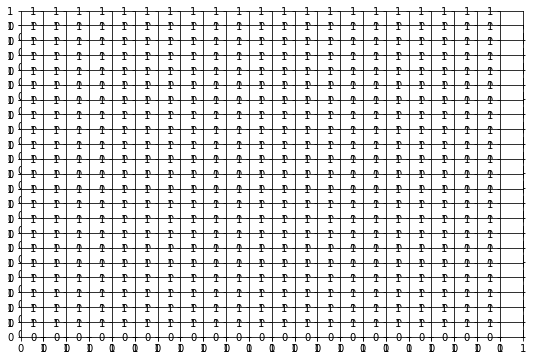

In [663]:
pd.scatter_matrix(corr_def, figsize=(9, 6))
plt.show()

In [593]:
corr_def_85 = corr_def['Aerial battles won'][corr_def['Aerial battles won']>=0.85].sort_values(ascending=False)[1:].to_frame()
col_def_85 = list(corr_def_85.index)
# type(col_85_def[0])


# dataframe으로 저장
corr_def_85.to_csv("C:\\PythonProj\\csv_files\\corr_def_85_df.csv", index=True)

corr_def_85

,Aerial battles won
Duels won,0.964970
Recoveries,0.954034
Interceptions,0.919549
Clean sheets,0.895448
Headed Clearance,0.868981
Aerial battles lost,0.865272
Clearances,0.855670


In [440]:
# Goal : (15, 7)에 맞추기
plus_stats_def = stats_def[plus_col_def]

# Tackle 행 합치기 -> (15, 14)
plus_stats_def['Valid Tackles'] = plus_stats_def['Tackles'] * plus_stats_def['Tackle success %'] / 100
plus_stats_def.drop(['Tackles', 'Tackle success %'], axis=1, inplace=True)

# Interceptions + Recoveries + Blocked shots -> (15, 12)
plus_stats_def['Valid Block'] = plus_stats_def['Interceptions'] + plus_stats_def['Recoveries'] + plus_stats_def['Blocked shots']
plus_stats_def.drop(['Interceptions', 'Recoveries', 'Blocked shots'], axis=1, inplace=True)

# Clearances + Headed Clearance + Clearances off line	 -> (15, 10)
plus_stats_def['Valid Clearance'] = plus_stats_def['Clearances'] + plus_stats_def['Headed Clearance'] + plus_stats_def['Clearances off line']
plus_stats_def.drop(['Clearances', 'Headed Clearance', 'Clearances off line'], axis=1, inplace=True)

# Aerial battles won + Headed Clearance + Clearances off line	 -> (15, 7)
plus_stats_def['Valid oto'] = plus_stats_def['Aerial battles won'] + plus_stats_def['Duels won'] + plus_stats_def['Successful 50/50s'] + plus_stats_def['Clean sheets']
plus_stats_def.drop(['Aerial battles won', 'Duels won', 'Successful 50/50s', 'Clean sheets'], axis=1, inplace=True)

plus_stats_def.head()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Assists,Passes per match,Big chances created,Valid Tackles,Valid Block,Valid Clearance,Valid oto
0,6,73.81,6,31.02,207,107,271
1,1,37.80,0,10.95,57,13,78
2,0,65.36,0,12.92,62,81,65
3,0,69.11,2,40.96,319,255,398
4,5,52.75,7,30.16,168,68,176


In [441]:
# # array로 변경하기 위해 column, index 탈락시키기
# # df.drop('A', axis=1, inplace=False) # 하나씩 탈락시키기 가능

# minus_stats_def = stats_def[minus_col_def]
# minus_stats_def.head()

# val_plus_stats_def = plus_stats_def.values # (15,15)
# val_minus_stats_def = minus_stats_def.values # (15, 7)
# val_plus_stats_def

stats_def_pre = stats_def['']

array([[  6.  ,  73.81,   6.  ,  31.02, 207.  , 107.  , 271.  ],
       [  1.  ,  37.8 ,   0.  ,  10.95,  57.  ,  13.  ,  78.  ],
       [  0.  ,  65.36,   0.  ,  12.92,  62.  ,  81.  ,  65.  ],
       [  0.  ,  69.11,   2.  ,  40.96, 319.  , 255.  , 398.  ],
       [  5.  ,  52.75,   7.  ,  30.16, 168.  ,  68.  , 176.  ],
       [  0.  ,  29.65,   0.  ,  17.04,  86.  , 118.  ,  73.  ],
       [  6.  ,  44.97,   5.  ,  32.9 , 142.  ,  95.  , 204.  ],
       [  2.  ,  32.33,   2.  ,   4.  ,  12.  ,   8.  ,  22.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,  60.23,   0.  ,  23.94, 205.  , 240.  , 233.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  2.  ,  45.65,   5.  ,  26.88, 123.  ,  81.  , 196.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ]])

In [442]:
# 배열연결 : https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/
# vstack 명령은 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 행의 수가 더 많은 배열을 만든다.
# 연결할 배열은 마찬가지로 하나의 리스트에 담아야 한다.

# Normalization(scale) : https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/


from sklearn.preprocessing import normalize, scale

x = np.vstack([val_plus_stats_def + val_minus_stats_def]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n\n", x)
print("\nscale:\n\n", y1)
print("\nnorms (scale)\n\n", np.linalg.norm(y1, axis=1))
print("\nnormlize:\n\n", y2)
print("\nnorms (normalize)\n\n", np.linalg.norm(y2, axis=1))

original x:

 [[ 28.    15.    13.    31.    26.    32.    26.     6.     0.     0.
    0.    21.     0.    14.     0.  ]
 [ 75.81  41.8   68.36  73.11  53.75  34.65  47.97  32.33   0.     0.
    0.    61.23   0.    46.65   0.  ]
 [  7.     0.     0.     2.     7.     0.     5.     2.     0.     0.
    0.     1.     0.     6.     0.  ]
 [ 48.02  22.95  20.92  60.96  48.16  37.04  56.9    5.     0.     0.
    0.    48.94   0.    47.88   0.  ]
 [209.    57.    62.   320.   171.    86.   142.    12.     0.     0.
    0.   205.     0.   125.     0.  ]
 [198.    62.   126.   366.   149.   178.   213.    24.     0.     0.
    0.   351.     0.   172.     0.  ]
 [304.    83.    94.   464.   205.    97.   254.    26.     0.     0.
    0.   295.     0.   225.     0.  ]]

scale:

 [[-0.92322346 -0.9317674  -0.9820895  -0.89908073 -0.93667891 -0.62424868
  -0.89087831 -0.84173375  0.          0.          0.         -0.90950529
   0.         -0.98556425  0.        ]
 [-0.46468763  0.0571976   0.315

#### re-preprocessing def dataframe

In [511]:
stats_def_pre.loc[1, 'Aerial battles won']

8

In [594]:
# corr_def = stats_def_part.corr()

# for i in use_col_def:
#     temp=0
#     for j in corr_def[i]:
#         if j >= 0.85: # Aerial battles won 제일 많다.
#             temp += 1
#     print(i, temp)

col_def_85
stats_def_pre = stats_def[use_col_def]
stats_def_pre# ['Aerial battles won']
stats_def_part = stats_def_pre # 복사하기

# 'Aerial battles won' = 0인 rows 드롭시키기
for i in range(len(stats_def_pre)):
    if stats_def_pre.loc[i, 'Aerial battles won']==0:
        stats_def_part = stats_def_part.drop(i, axis=0)
        # stats_kp_part = stats_kp_pre.drop([2,3], axis=0).reset_index(drop=True)

stats_def_part = stats_def_part.reset_index(drop=True)[col_def_85]
stats_def_part # 유의미한 선수만 들어있는 테이블 완성

,Duels won,Recoveries,Interceptions,Clean sheets,Headed Clearance,Aerial battles lost,Clearances
0,161,175,29,14,40,33,67
1,58,45,9,1,2,5,10
2,40,57,4,5,31,29,50
3,235,247,60,15,85,66,170
4,120,147,20,7,23,29,45
5,51,55,30,1,40,24,78
6,132,110,28,12,33,50,62
7,15,9,3,1,2,4,6
8,138,164,38,13,81,62,159
9,127,89,31,6,33,29,48


In [527]:
# 정규화시키기
stats_def_val = stats_def_part.values

x = stats_def_val
y1 = scale(x)
y2 = normalize(x)

print("original x:\n\n", x)
print("\nscale:\n\n", y1)
print("\nnorms (scale)\n\n", np.linalg.norm(y1, axis=1))
print("\nnormlize:\n\n", y2)
print("\nnorms (normalize)\n\n", np.linalg.norm(y2, axis=1))

original x:

 [[161 175  29  14  40  33  67]
 [ 58  45   9   1   2   5  10]
 [ 40  57   4   5  31  29  50]
 [235 247  60  15  85  66 170]
 [120 147  20   7  23  29  45]
 [ 51  55  30   1  40  24  78]
 [132 110  28  12  33  50  62]
 [ 15   9   3   1   2   4   6]
 [138 164  38  13  81  62 159]
 [127  89  31   6  33  29  48]]

scale:

 [[ 0.84337871  0.94128098  0.23187981  1.218631    0.1136168  -0.00501702
  -0.04788209]
 [-0.78641505 -0.93550625 -0.98854024 -1.218631   -1.32552937 -1.40978376
  -1.13959375]
 [-1.07123337 -0.76226435 -1.29364525 -0.46870423 -0.22723361 -0.20569799
  -0.3734803 ]
 [ 2.0142985   1.98073237  2.12353088  1.40611269  1.81786885  1.65060091
   1.92486002]
 [ 0.19462586  0.53704989 -0.31730921 -0.09374085 -0.53021175 -0.20569799
  -0.46924448]
 [-0.89717773 -0.791138    0.29290081 -1.218631    0.1136168  -0.45654919
   0.16279911]
 [ 0.38450474  0.00288736  0.17085881  0.84366761 -0.15148907  0.84787706
  -0.14364627]
 [-1.46681438 -1.45523195 -1.35466625 -1.2

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [528]:
# corr_85_def.loc['Recoveries', 'Aerial battles won']
# corr_85_def.loc['Duels won']
y2[1][0]*corr_85_def.loc['Recoveries', 'Aerial battles won']


0.7394310670178131

In [530]:
est_def = []

for i in range(len(y2)):
    est_def.append(0)
    for j in range(len(y2[i])):
        idx = col_85_def[j]
        est_def[i] += y2[i][j]*(corr_85_def.loc[idx])
    
    est_def[i] = round(est_def[i]['Aerial battles won'], 4)
    
est_def # 각 def 선수별stat 점수화

[1.8947,
 1.6395,
 2.0438,
 2.0152,
 1.8248,
 2.0759,
 2.0232,
 1.9209,
 2.0668,
 1.9646]

### keeper table preprocessing

In [544]:
stats_kp.columns
use_col_kp = ['Saves', 'Penalties saved', 'Punches',
               'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
               'Goal Kicks', 'Clean sheets', 'Goals conceded',
               'Errors leading to goal', 'Own goals', 'Yellow cards', 'Red cards',
               'Fouls', 'Goals', 'Assists', 'Passes', 'Passes per match',
               'Accurate long balls']
stats_kp_pre = stats_kp[use_col_kp]
stats_kp_pre.head()
stats_kp_pre.shape # (5, 24)

val_stats_kp = stats_kp_pre.values
val_stats_kp

array([[ 86.  ,   0.  ,  20.  ,  17.  ,   9.  ,  37.  , 169.  , 227.  ,
         15.  ,  35.  ,   5.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,
          0.  , 996.  ,  27.67, 217.  ],
       [  4.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   2.  ,   9.  ,
          0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,  24.  ,  24.  ,   2.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [  3.  ,   0.  ,   1.  ,   2.  ,   0.  ,   2.  ,   3.  ,   8.  ,
          1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,  22.  ,  22.  ,   7.  ]])

#### Extracting Inner keeper-stats relationship

In [581]:
stats_kp_part = stats_kp_pre.drop([2,3], axis=0).reset_index(drop=True)
stats_kp_part

,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Clean sheets,Goals conceded,Errors leading to goal,Own goals,Yellow cards,Red cards,Fouls,Goals,Assists,Passes,Passes per match,Accurate long balls
0,86,0,20,17,9,37,169,227,15,35,5,0,1,0,1,0,0,996,27.67,217
1,4,0,0,0,0,0,2,9,0,1,0,0,0,0,0,0,0,24,24.00,2
2,3,0,1,2,0,2,3,8,1,0,0,0,0,0,0,0,0,22,22.00,7


In [582]:
corr_kp = stats_kp_part.corr()

# 유의미한 종속변수 솎아내기
for i in use_col_kp:
    temp=0
    for j in corr_kp[i]:
        if j >= 0.95: # 표본이 적어서 유의미한 값이 산출되지 않음. 'Saves'로 임의로 정해서 가겠음.
            temp += 1
    print(i, temp)

Saves 14
Penalties saved 0
Punches 14
High Claims 14
Catches 14
Sweeper clearances 14
Throw outs 14
Goal Kicks 14
Clean sheets 14
Goals conceded 14
Errors leading to goal 14
Own goals 0
Yellow cards 14
Red cards 0
Fouls 14
Goals 0
Assists 0
Passes 14
Passes per match 1
Accurate long balls 14


In [583]:
# 관계없는 상관계수 드롭시키기
for i in use_col_kp:
    
    if str(corr_kp['Saves'][i]) == 'nan':
        corr_kp = corr_kp.drop(i, axis=0)
        corr_kp = corr_kp.drop(i, axis=1)
        
corr_kp_95 = corr_kp['Saves'][corr_kp['Saves']>=0.95].sort_values(ascending=False)[1:].to_frame()

col_kp_95 = list(corr_kp_95.index)


# dataframe으로 저장
corr_kp_95.to_csv("C:\\PythonProj\\csv_files\\corr_kp_95_df.csv", index=True)

corr_kp_95

,Saves
Goal Kicks,0.999979
Passes,0.999962
Errors leading to goal,0.999945
Catches,0.999945
Fouls,0.999945
Yellow cards,0.999945
Goals conceded,0.999893
Throw outs,0.999877
Accurate long balls,0.999524
Punches,0.998495


In [584]:
# 정규화시키기
stats_kp_val = stats_kp_part[col_kp_95].values
x = stats_kp_val
y1 = scale(x)
y2 = normalize(x)

print("original x:\n\n", x)
print("\nscale:\n\n", y1)
print("\nnorms (scale)\n\n", np.linalg.norm(y1, axis=1))
print("\nnormlize:\n\n", y2)
print("\nnorms (normalize)\n\n", np.linalg.norm(y2, axis=1))

original x:

 [[227 996   5   9   1   1  35 169 217  20  37  15  17]
 [  9  24   0   0   0   0   1   2   2   0   0   0   0]
 [  8  22   0   0   0   0   0   3   7   1   2   1   2]]

scale:

 [[ 1.41420245  1.41421132  1.41421356  1.41421356  1.41421356  1.41421356
   1.41376821  1.41419443  1.41392005  1.41282093  1.41257958  1.41169791
   1.40599928]
 [-0.70224699 -0.70492548 -0.70710678 -0.70710678 -0.70710678 -0.70710678
  -0.67615001 -0.71346746 -0.73191155 -0.76074973 -0.76514727 -0.77886781
  -0.83481207]
 [-0.71195547 -0.70928584 -0.70710678 -0.70710678 -0.70710678 -0.70710678
  -0.7376182  -0.70072697 -0.68200849 -0.6520712  -0.64743231 -0.6328301
  -0.57118721]]

norms (scale)

 [5.09499633 2.6381275  2.46602832]

normlize:

 [[0.21422617 0.93995272 0.00471864 0.00849355 0.00094373 0.00094373
  0.03303047 0.15948997 0.2047889  0.01887455 0.03491792 0.01415591
  0.01604337]
 [0.34874292 0.92998111 0.         0.         0.         0.
  0.03874921 0.07749843 0.07749843 0.         

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [585]:
# 각 선수별stat 점수화
est_kp = []

for i in range(len(y2)):
    est_kp.append(0)
    for j in range(len(y2[i])):
        
        est_kp[i] += y2[i][j]*corr_kp_95.loc[col_kp_95[j]]
    
    est_kp[i] = round(est_kp[i]['Saves'], 4)
    
est_kp 

[1.6502, 1.4724, 1.8523]

### MidFielder table preprocessing

In [586]:
stats_mid.columns
use_col_mid = ['Goals', 'Goals per match',
           'Headed goals', 'Goals with right foot', 'Goals with left foot',
           'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
           'Shooting accuracy %', 'Hit woodwork', 'Big chances missed', 'Assists',
           'Passes', 'Passes per match', 'Big chances created', 'Crosses',
           'Cross accuracy %', 'Through balls', 'Accurate long balls',
           'Yellow cards', 'Red cards', 'Fouls', 'Offsides', 'Tackles',
           'Tackle success %', 'Blocked shots', 'Interceptions', 'Clearances',
           'Headed Clearance', 'Recoveries', 'Duels won', 'Duels lost',
           'Successful 50/50s', 'Aerial battles won', 'Aerial battles lost',
           'Errors leading to goal']
stats_mid_pre = stats_mid[use_col_mid]
for i in range(len(stats_mid_pre)):
    stats_mid_pre.loc[i, "Passes"] = int(stats_mid_pre.loc[i, "Passes"].replace(",",""))
    
# stats_mid_pre['Passes'] = [w.replace(",", "") for w in stats_mid_pre['Passes']]
# stats_mid_pre['Passes'] = [stats_mid_pre['Passes', i] =  for i in range(len(stats_mid_pre['Passes']))]
# stats_mid_pre['Passes']
# stats_mid_pre.shape # (17, 37)
stats_mid_pre

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,...,Interceptions,Clearances,Headed Clearance,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Errors leading to goal
0,2,0.08,0,0,2,0,0,20,6,30,...,7,4,4,49,68,86,23,6,14,0
1,1,0.06,0,1,0,0,0,12,3,25,...,10,20,13,78,74,63,18,18,15,1
2,0,0.00,0,0,0,0,0,4,0,0,...,1,1,1,21,20,32,6,0,1,0
3,0,0.00,0,0,0,0,0,32,7,22,...,48,82,46,170,163,127,13,83,62,2
4,1,0.03,0,0,1,0,0,19,8,42,...,9,21,16,108,64,70,18,16,17,0
5,0,0.00,0,0,0,0,0,11,3,27,...,33,12,7,181,141,136,68,9,16,0
6,9,0.25,0,6,3,0,0,69,17,25,...,19,18,10,181,202,265,44,30,52,1
7,10,0.27,0,4,6,0,0,97,39,40,...,31,17,3,227,118,177,29,18,27,0
8,0,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0.00,0,0,0,0,0,3,0,0,...,11,8,3,53,34,33,8,4,6,0


#### Extracting Inner midfilder-stats relationship

In [587]:
stats_mid_pre['Through balls'][0]

5

In [595]:
corr_mid = stats_mid_part.corr()

# 유의미한 종속변수 솎아내기
for i in use_col_mid:
    temp=0
    for j in corr_mid[i]:
        if j >= 0.95: # Through balls 이 가장 신뢰도 높은 상관관계를 가짐.
            temp += 1
    print(i, temp)


# 새로 영입된 선수 드롭시키기
stats_mid_part = stats_mid_pre # 복사시키기

for i in range(len(stats_mid_pre)):
    
    if (stats_mid_pre['Through balls'][i]) == 0 & (stats_mid_pre['Assists'][i]) == 0 :
        stats_mid_part = stats_mid_part.drop(i, axis=0)
        
stats_mid_part


# 관계없는 상관계수 행렬 드롭시키기 및 인덱스 반환하기

for i in use_col_mid:
    
    if str(corr_mid['Through balls'][i]) == 'nan':
        corr_mid = corr_mid.drop(i, axis=0)
        corr_mid = corr_mid.drop(i, axis=1)
        
corr_mid_95 = corr_mid['Through balls'][corr_mid['Through balls']>=0.95].sort_values(ascending=False)[1:].to_frame()

col_mid_95 = list(corr_mid_95.index)

# dataframe으로 저장
corr_mid_95.to_csv("C:\\PythonProj\\csv_files\\corr_mid_95_df.csv", index=True)

corr_mid_95

Goals 5
Goals per match 4
Headed goals 0
Goals with right foot 1
Goals with left foot 3
Penalties scored 0
Freekicks scored 0
Shots 5
Shots on target 4
Shooting accuracy % 1
Hit woodwork 1
Big chances missed 2
Assists 5
Passes 1
Passes per match 1
Big chances created 4
Crosses 1
Cross accuracy % 1
Through balls 5
Accurate long balls 1
Yellow cards 1
Red cards 0
Fouls 1
Offsides 2
Tackles 1
Tackle success % 1
Blocked shots 4
Interceptions 1
Clearances 3
Headed Clearance 2
Recoveries 1
Duels won 1
Duels lost 1
Successful 50/50s 1
Aerial battles won 2
Aerial battles lost 1
Errors leading to goal 1


,Through balls
Blocked shots,0.966258
Goals with left foot,0.965343
Goals,0.959616
Shots,0.950299


In [589]:
# 정규화시키기
stats_mid_val = stats_mid_part[col_mid_95].values
x = stats_mid_val
y1 = scale(x)
y2 = normalize(x)

print("original x:\n\n", x)
print("\nscale:\n\n", y1)
print("\nnorms (scale)\n\n", np.linalg.norm(y1, axis=1))
print("\nnormlize:\n\n", y2)
print("\nnorms (normalize)\n\n", np.linalg.norm(y2, axis=1))

original x:

 [[ 6  2  2 20]
 [ 2  0  1 12]
 [ 9  0  0 32]
 [ 5  1  1 19]
 [ 4  0  0 11]
 [21  3  9 69]
 [37  6 10 97]
 [ 1  0  0  3]]

scale:

 [[-0.39993573  0.25       -0.22510482 -0.41819158]
 [-0.7458261  -0.75       -0.48236748 -0.67803877]
 [-0.14051796 -0.75       -0.73963014 -0.02842079]
 [-0.48640833 -0.25       -0.48236748 -0.45067248]
 [-0.57288092 -0.75       -0.73963014 -0.71051967]
 [ 0.89715314  0.75        1.57573377  1.17337249]
 [ 2.2807146   2.25        1.83299643  2.08283767]
 [-0.83229869 -0.75       -0.73963014 -0.97036687]]

norms (scale)

 [0.66933173 1.34579773 1.06306433 0.85724975 1.39376594 2.28629037
 4.2381892  1.65646784]

normlize:

 [[0.2847474  0.0949158  0.0949158  0.949158  ]
 [0.16384638 0.         0.08192319 0.9830783 ]
 [0.27074558 0.         0.         0.96265094]
 [0.25383654 0.05076731 0.05076731 0.96457886]
 [0.34174306 0.         0.         0.93979342]
 [0.28867513 0.0412393  0.12371791 0.94850401]
 [0.35416835 0.05743271 0.09572118 0.928495

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [591]:
# 각 선수별stat 점수화
est_mid = []

for i in range(len(y2)):
    est_mid.append(0)
    for j in range(len(y2[i])):
        
        est_mid[i] += y2[i][j]*corr_mid_95.loc[col_mid_95[j]]
    
    est_mid[i] = round(est_mid[i]['Through balls'], 4)
    
est_mid 

[1.3598, 1.1712, 1.1764, 1.2596, 1.2233, 1.3388, 1.3719, 1.2071]

**Logistic Regression Reference Pages** - *For Recommendation Engine*
- [연관규칙분석 설명](https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/) </br>
- [연관규칙 코드](https://frhyme.github.io/associative_mining/)

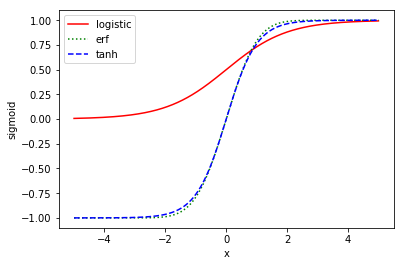

In [10]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()

In [ ]:
# import statsmodels.api as sm

# data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
# df_wrole = data_wrole.data
# df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
# df_wrole.tail()

In [ ]:
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

In [4]:
import pandas as pd 
import itertools 


def support(df, item_lst):
    return (df[list(item_lst)].sum(axis=1)==len(item_lst)).mean()


def make_all_set_over_support(df, support_threshold):
    items = []
    single_items = [col for col in df.columns if support(df, [col]) > support_threshold] # size 1 items
    
    size = 2
    while True:
        new_items = []
        for item_cand in itertools.combinations(single_items, size):
            #print(item_cand, (df[list(item_cand)].sum(axis=1)==size).mean())
            if support(df, list(item_cand)) > support_threshold:
                new_items.append(list(item_cand))
        if len(new_items)==0:
            break
        else:
            items+=new_items
            size+=1
    items += [ [s] for s in single_items]# 이렇게 해줘야 모든 type이 list가 됨
    return items


def make_confidence_lst(df, item_set_over_support, confidence_threshold):
    r_lst = []
    for item1 in item_set_over_support:
        for item2 in item_set_over_support:
            if len(set(item1).intersection(set(item2)))==0:
                conf = support(df, list(set(item1).union(set(item2))))/ support(df, item1)
                if conf > confidence_threshold:
                    r_lst.append((item1, item2, conf))
            else:
                continue
    return sorted(r_lst, key=lambda x: x[2], reverse=True)


def make_lift_lst(df, item_set_over_support, lift_threhsold):
    r_lst = []
    for item1 in item_set_over_support:
        for item2 in item_set_over_support:
            if len(set(item1).intersection(set(item2)))==0:
                lift = support(df, list(set(item1).union(set(item2))))
                lift /= support(df, item1)
                lift /= support(df, item2)
                if lift > lift_threhsold:
                    r_lst.append((item1, item2, lift))
            else:
                continue
    return sorted(r_lst, key=lambda x: x[2], reverse=True)


over_support_lst = make_all_set_over_support(df, 0.07)# 0.05로 하면 두 개짜리도 나옴. 로 하면 3개 짜리도 나옴
print("over support list")
print(over_support_lst)
print("-----------------")
print("over confidence list")
for a, b, conf in  make_confidence_lst(df, over_support_lst, 0.53):
    print("{} => {}: {}".format(a, b, conf))
print("-----------------")
print("over lift list")
for a, b, lift in  make_lift_lst(df, over_support_lst, 5.6):
    print("{} => {}: {}".format(a, b, lift))
print("-----------------")